<div class="alert alert-block" style = "background-color: black">
    <p><b><font size="+4" color="orange">Data Cleaning & Transformation in Pandas</font></b></p>
    <p><b><font size="+1" color="white">by Jubril Davies</font></b></p>
    </div>

In [119]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({'font.size':14}) #sets global font size

$$\begin{align} \text{This work focuses on filtering, cleaning and transforming data} \end{align}$$
---
<div class= "alert alert-block" style="background-color: orange; border-color: black">
    <p><b><font size="+2" color="black">Removing Duplicates</font></b></p>
    </div>
    
---

A messy dataset may contain duplicate rows for many reasons. This may be valid duplicates or invalid depending on the context of the domain problem. In invalid cases, the DataFrame methods `duplicated` and `drop_duplicates` offer an excellent way of handling such situations.

> #### **Given the DataSet**

In [2]:
data = pd.DataFrame({'Name':['Adam','Bale','Chris','Dave','Edward','Adam','Bale','Adam'],
                    'Age':[25,30,35,40,45,25,30,28], 'Dept':['HR','IT','Sales','IT','Supply','HR','IT','HR'],
                    'Salary':[50000,60000,70000,80000,90000,50000,60000,52000]})
data

Name  Age    Dept  Salary
0    Adam   25      HR   50000
1    Bale   30      IT   60000
2   Chris   35   Sales   70000
3    Dave   40      IT   80000
4  Edward   45  Supply   90000
5    Adam   25      HR   50000
6    Bale   30      IT   60000
7    Adam   28      HR   52000

In [3]:
data_no_duplicates = data.drop_duplicates()
data_no_duplicates

Name  Age    Dept  Salary
0    Adam   25      HR   50000
1    Bale   30      IT   60000
2   Chris   35   Sales   70000
3    Dave   40      IT   80000
4  Edward   45  Supply   90000
7    Adam   28      HR   52000

In [4]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7    False
dtype: bool

> #### **Remove duplicates based on Specific Columns**
Remove duplicates based only on the Name and Department columns, keeping the first occurrence

In [5]:
data_no_duplicates_specific = data.drop_duplicates(subset=['Name','Dept'])

data_no_duplicates_specific

Name  Age    Dept  Salary
0    Adam   25      HR   50000
1    Bale   30      IT   60000
2   Chris   35   Sales   70000
3    Dave   40      IT   80000
4  Edward   45  Supply   90000

> #### **Passing the `keep=last` will return only the last one**

In [6]:
data_no_duplicates_keep_last = data.drop_duplicates(['Name','Dept'],keep='last')

data_no_duplicates_keep_last

Name  Age    Dept  Salary
2   Chris   35   Sales   70000
3    Dave   40      IT   80000
4  Edward   45  Supply   90000
6    Bale   30      IT   60000
7    Adam   28      HR   52000

> #### **After removing duplicates, it might be necessary to reset index for a cleaner dataframe**

In [7]:
data_reset_index = data.drop_duplicates().reset_index(drop=True)

data_reset_index

Name  Age    Dept  Salary
0    Adam   25      HR   50000
1    Bale   30      IT   60000
2   Chris   35   Sales   70000
3    Dave   40      IT   80000
4  Edward   45  Supply   90000
5    Adam   28      HR   52000

<div class= "alert alert-block" style="background-color: orange; border-color: black">
    <p><b><font size="+2" color="black">Transforming Data using a Function or Mapping</font></b></p>
    </div>

---

In some instances, it might be necessary to transform data based on values in an array, series or dataframe. This can be achieved using a function or Pandas map function in the case of a dataframe.

<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">1. Transforming Data in an Array</font></b></p>
    </div>

> #### **Given an array of temperatures**

In [8]:
celsius_temp = np.array([0,20,30,40,100])
celsius_temp

array([  0,  20,  30,  40, 100])

**Define a transformation function to convert celsius to fahrenheit**

In [9]:
def celsius_to_fahrenheit(celsius):
    return celsius * 9/5 + 32

# Apply the function to the array
vectorized_func = np.vectorize(celsius_to_fahrenheit)
fahrenheit_temp = vectorized_func(celsius_temp)
temp = pd.DataFrame({'celsius_temp':celsius_temp,'fahrenheit_temp':fahrenheit_temp})
temp

celsius_temp  fahrenheit_temp
0             0             32.0
1            20             68.0
2            30             86.0
3            40            104.0
4           100            212.0

<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">2. Transforming Data in a Series</font></b></p>
    </div>

> #### **Given a series of dates with the goal of applying transformations to extract weekdays and weekends**

In [10]:
dates = pd.Series(['2024-01-01','2024-01-02','2024-01-03','2024-01-04','2024-01-05','2024-01-06','2024-01-07'])
dates

0    2024-01-01
1    2024-01-02
2    2024-01-03
3    2024-01-04
4    2024-01-05
5    2024-01-06
6    2024-01-07
dtype: object

**Convert the strings to datetime objects**

In [11]:
dates = pd.to_datetime(dates)
dates

0   2024-01-01
1   2024-01-02
2   2024-01-03
3   2024-01-04
4   2024-01-05
5   2024-01-06
6   2024-01-07
dtype: datetime64[ns]

**Define a function to get the day of the week**

In [12]:
def get_day_week(dates):
    return dates.day_name()

#Apply the function to the weekdays
weekdays = dates.map(get_day_week)
weekdays

0       Monday
1      Tuesday
2    Wednesday
3     Thursday
4       Friday
5     Saturday
6       Sunday
dtype: object

**Define a new function to check whether each date is a weekend**

In [13]:
def is_weekend(date):
    return date.weekday() >= 5

#Apply the function to weekends
weekends = weekdays[dates.map(is_weekend)]
weekends

5    Saturday
6      Sunday
dtype: object

<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">3. Transforming Data in a DataFrame</font></b></p>
    </div>

> #### **Given a dataset of housing prices with the goal of normalizing housing prices**

In [14]:
housing = pd.DataFrame({'Location':['New York','San Francisco','Los Angeles','Chicago','Houston'],
                       'Price':[1250000,1450000,1650000,800000,650000]})
housing

Location    Price
0       New York  1250000
1  San Francisco  1450000
2    Los Angeles  1650000
3        Chicago   800000
4        Houston   650000

**Define a transformation function to normalize the prices**

In [15]:
def normalize_price(price,mean_price,std_price):
    return(price - mean_price)/std_price

#Calculate mean and std of prices
mean_price = housing['Price'].mean()
std_price = housing['Price'].std()

#Apply the function to the housing prices
housing['Normalized_Prices'] = housing['Price'].map(lambda x: normalize_price(x,mean_price, std_price))
housing

Location    Price  Normalized_Prices
0       New York  1250000           0.211838
1  San Francisco  1450000           0.682589
2    Los Angeles  1650000           1.153340
3        Chicago   800000          -0.847352
4        Houston   650000          -1.200415

<div class= "alert alert-block" style="background-color: orange; border-color: black">
    <p><b><font size="+2" color="black">Replacing Values</font></b></p>
    </div>

---

There are a couple of ways to fill in missing data using Pandas:

* `fillna` method is a special case of general value replacement
* `map` is used to modify a subset of values
* `replace` provides a simpler and more flexible way to modify a subset of values

> #### **Given the dataset**

In [16]:
dt = pd.Series([100, 120, -999, -1000, 350])
dt

0     100
1     120
2    -999
3   -1000
4     350
dtype: int64

In [17]:
dt.replace([-999,-1000],np.nan)

0    100.0
1    120.0
2      NaN
3      NaN
4    350.0
dtype: float64

**To use a different replacement value for each value, pass a list of substitutes**

In [18]:
dt.replace([-999,-1000],[np.nan,0])

0    100.0
1    120.0
2      NaN
3      0.0
4    350.0
dtype: float64

**A dictionary of values and replacements can also be passed as arguments**

In [19]:
dt.replace({-999:np.nan,-1000:0})

0    100.0
1    120.0
2      NaN
3      0.0
4    350.0
dtype: float64

<div class= "alert alert-block" style="background-color: orange; border-color: black">
    <p><b><font size="+2" color="black">Renaming Axis Indexes</font></b></p>
    </div>

---

An axis label is either a column name, a row name or an index name. This can be modified in place without creating a new data structure.

> #### **Given the DataFrame**

In [20]:
dm = pd.DataFrame(np.linspace(25000,300000,12).reshape((3,4)),index=['Lagos','Maryland','Ikoyi'],
                  columns=['one','two','three','four'])
dm

one       two     three      four
Lagos      25000.0   50000.0   75000.0  100000.0
Maryland  125000.0  150000.0  175000.0  200000.0
Ikoyi     225000.0  250000.0  275000.0  300000.0

> #### **The index has a map method which can be used to modify its labels**
Modify the dataframe in place

In [21]:
dm.index = dm.index.map(str.upper)
dm

one       two     three      four
LAGOS      25000.0   50000.0   75000.0  100000.0
MARYLAND  125000.0  150000.0  175000.0  200000.0
IKOYI     225000.0  250000.0  275000.0  300000.0

> #### **Creating a transformed version rather than modifying the original dataframe**
#### Use rename: It returns a reference to the original dataframe

In [22]:
dm.rename(index=str.title,columns=str.upper)

ONE       TWO     THREE      FOUR
Lagos      25000.0   50000.0   75000.0  100000.0
Maryland  125000.0  150000.0  175000.0  200000.0
Ikoyi     225000.0  250000.0  275000.0  300000.0

#### rename can be used with a dictionary like reference to specify changes

In [23]:
dm.rename(index={'LAGOS': 'INDIANA'},columns={'three':'THIRD'})

one       two     THIRD      four
INDIANA    25000.0   50000.0   75000.0  100000.0
MARYLAND  125000.0  150000.0  175000.0  200000.0
IKOYI     225000.0  250000.0  275000.0  300000.0

<div class= "alert alert-block" style="background-color: orange; border-color: black">
    <p><b><font size="+2" color="black">Discretizing & Binning</font></b></p>
    </div>

---

At times, it is important to categorize continous variables into bins for statistical analysis

> #### **Using `cut` method in Pandas to bin variables**

In [48]:
scores = [21,23,24,56,37,31,42,67,82,52]
grades = pd.DataFrame(scores,columns=['scores'])

**Lets divide this into bin intervals using a cut function in Pandas**

In [51]:
bins = [20,40,60,80,100]
binned_grades = pd.cut(grades['scores'],bins)

#Assess how many elements are within each interval
pd.value_counts(binned_grades)

(20, 40]     5
(40, 60]     3
(60, 80]     1
(80, 100]    1
Name: scores, dtype: int64

**(  ]** - This means that the parenthesis side is open while the square brackets side is closed. The open side can be changed by passing the right=False argument in the cut function. 

In [54]:
binned_grades = pd.cut(grades['scores'],bins,right=False)
pd.value_counts(binned_grades)

[20, 40)     5
[40, 60)     3
[60, 80)     1
[80, 100)    1
Name: scores, dtype: int64

#### **It is possible to specify bin names as labels in the cut function**

In [56]:
class_groups = ['Crimson', 'Jade','Silver','Gold']
binned_grades = pd.cut(grades['scores'],bins,labels=class_groups)
binned_grades

0    Crimson
1    Crimson
2    Crimson
3       Jade
4    Crimson
5    Crimson
6       Jade
7     Silver
8       Gold
9       Jade
Name: scores, dtype: category
Categories (4, object): ['Crimson' < 'Jade' < 'Silver' < 'Gold']

In [61]:
scores_n_grades=pd.DataFrame({'scores':scores,'grades':binned_grades})
scores_n_grades

scores   grades
0      21  Crimson
1      23  Crimson
2      24  Crimson
3      56     Jade
4      37  Crimson
5      31  Crimson
6      42     Jade
7      67   Silver
8      82     Gold
9      52     Jade

>#### **For uniformly distributed data, an integer can be passed into the cut function to obtain equal bin intervals**

In [65]:
data = np.random.rand(25)
binned_data = pd.cut(data,5, precision=2)
pd.value_counts(binned_data)

(0.79, 0.97]    9
(0.07, 0.25]    8
(0.43, 0.61]    3
(0.61, 0.79]    3
(0.25, 0.43]    2
dtype: int64

#### **Using `qcut` to bin data into sample quantiles**

This was born out of the need to evenly distribute  the data in the bins. Since `qcut` uses sample qauntiles by definition it is possible to obtain equal size bins

> #### **Given a normally distributed data**

In [69]:
dn = pd.DataFrame({'bell_data': np.random.randn(1000)}) 
qcut_dn = pd.cut(dn['bell_data'],4,labels=['Q1','Q2','Q3','Q4']) # cut into quartiles
pd.value_counts(qcut_dn)

Q3    484
Q2    382
Q4     91
Q1     43
Name: bell_data, dtype: int64

<div class= "alert alert-block" style="background-color: orange; border-color: black">
    <p><b><font size="+2" color="black">Detecting & Filtering Outliers</font></b></p>
    </div>

---

Detecting and Filtering outliers is a critical step in data cleaning and transformation. We shall consider three methods of handling outliers using Pandas, Numpy and Visualization tools:

* Z-score method for univariate data
* IQR method for univariate skewed distributions
* Isolation Forest for high-dimensional data
* Local Outlier Factor for datasets of varying density
* Mahalanobis Distance for multivariate outlier detection

<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">1. Detecting Outliers using the z-score method</font></b></p>
    </div>

> #### **Given the student age dataset**

name  age    zscore   outlier
11  Hans  100  3.313692  3.313692

<Figure size 576x360 with 0 Axes>

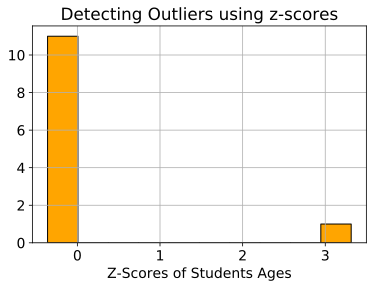

In [108]:
students = pd.DataFrame({'name':['Frank','Abel','Cane','David','Esau','Chris','Phillip','Greg','Fisher','Renee','Tristan','Hans'],
                       'age':[10,12,12,13,12,11,12,11,13,10,10,100]})

#Calculate z-score
from scipy.stats import zscore
students['zscore'] = zscore(students['age'])
students['outlier'] = students['zscore']

#Visualize Outliers
plt.figure(figsize=(8,5));
students.hist('outlier',edgecolor='black',color='orange');
plt.xlabel('Z-Scores of Students Ages');
plt.title('Detecting Outliers using z-scores');

#Identify Outliers
students[students['outlier'].abs()>3]

<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">2. Detecting Outliers using the Inter-Quartile Range method</font></b></p>
    </div>

> #### **Given a dataset with a column of normal and outlier values**

In [114]:
data1 = np.random.normal(loc=50, scale=10, size=1000) #Normal distribution
data1 = np.append(data1,[150,200,300]) #Adding Outliers
data1 = pd.DataFrame({'data':data1})
data1.head()

data
0  55.708716
1  51.615239
2  57.698575
3  58.962629
4  45.156646

**Calculate IQR and identify Outliers**

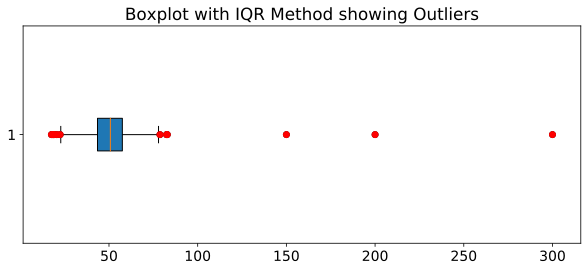

data  outlier
67     18.059911     True
103    82.434391     True
151    17.554268     True
320    18.669862     True
361    20.595989     True
674    22.477158     True
782    82.880751     True
820    78.722372     True
905    19.048076     True
1000  150.000000     True
1001  200.000000     True
1002  300.000000     True

In [131]:
Q1 = data1['data'].quantile(0.25)
Q3 = data1['data'].quantile(0.75)
IQR = Q3 - Q1

#Identify Outliers
data1['outlier'] = (data1['data'] < (Q1 - 1.5*IQR)) | (data1['data'] > (Q3 + 1.5* IQR))

#Visualize Outliers
plt.figure(figsize=(10,4))
plt.boxplot(data1['data'],vert=False,patch_artist=True)
plt.scatter(outliers['data'],np.ones(len(outliers)),color='red',zorder=3)
plt.title('Boxplot with IQR Method showing Outliers');
plt.show()

#Display Outliers
outliers = data1[data1['outlier']]
outliers

<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">3. Detecting Outliers using Isolation Forest method</font></b></p>
    <p><b><font size="+1" color="white">For high-dimensional data</font></b></p>
    </div>

> #### **Given a high-dimensional dataset with a column of normal and outlier values**

In [171]:
#Generate high-dimensional data
np.random.seed(40)
hdata = np.random.randn(1000,5) #Normal distribution
hdata[:50] += np.random.uniform(10,20, size=(50,5)) #Adding Outliers
columns = [f'feature_{i}' for i in range(1,6)] #Label columns
hdata_df = pd.DataFrame(hdata,columns=columns) #create the dataframe

from sklearn.ensemble import IsolationForest
#Fit the Model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

#Predict the outliers
hdata_df['outlier'] = iso_forest.fit_predict(hdata_df)

hdata_df['outlier'] = hdata_df['outlier'] == -1
num_outliers = hdata_df['outlier'].sum()
hdata_df.head(10)

feature_1  feature_2  feature_3  feature_4  feature_5  outlier
0  10.066169  15.562446  13.316041  19.710294  15.543549     True
1  18.580897  20.842810  19.627943  11.968192  18.555324     True
2  13.128506  19.453426  18.730020  17.195754  11.891071     True
3  11.596662  10.372573  13.817410  16.813016  17.489866     True
4  15.564599  12.303034  17.855777  17.287169  11.204100     True
5  17.003881  14.818243  12.976683  16.465543  13.852850     True
6  11.419861  14.897461  15.021424  16.385946  11.922737     True
7  12.994568  14.906894  12.700972  16.357953  16.912696     True
8  20.829643  15.124330  15.367783  11.744270  15.313717     True
9  20.170012  19.431205  11.336032  14.836332  20.261532     True

**Displayed number of outliers matches the number added**

In [170]:
num_outliers

50

> #### **Visualize Results using pairplot with Outliers highlighted**

In [179]:
sb.pairplot(hdata_df, hue='outlier', palette={False: 'blue', True: 'red'}, plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of High-Dimensional data with Outliers highlighted',y=1.02)
plt.show()

<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">4. Detecting Outliers using the Local Outlier Factor Method</font></b></p>
    </div>

> #### **Given a dataset with a column of normal and outlier values**

In [186]:
dl = np.random.normal(loc=50, scale=10, size=1000) #Normal distribution
dl = np.append(dl,[150,200,300]) #Adding Outliers
dl_df = pd.DataFrame(dl,columns=['value'])
dl_df.head()

value
0  42.874129
1  59.579315
2  61.081933
3  43.683247
4  57.171132

In [190]:
from sklearn.neighbors import LocalOutlierFactor

#Fit the Model
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.01)
dl_df['outlier'] = lof.fit_predict(dl_df[['value']])

#Display Outliers
outliers = dl_df[dl_df['outlier'] == -1]
outliers

value  outlier
63     20.668438       -1
373    20.349751       -1
429    86.075168       -1
520    18.022149       -1
533    21.428214       -1
593    15.830772       -1
625    81.507436       -1
793     5.722515       -1
1000  150.000000       -1
1001  200.000000       -1
1002  300.000000       -1

**Filter out the Outliers**

In [195]:
dl_df_cleaned = dl_df[dl_df['outlier'] != -1]
dl_df_cleaned = dl_df_cleaned.drop(columns=['outlier'])
dl_df_cleaned.head(10)

value
0  42.874129
1  59.579315
2  61.081933
3  43.683247
4  57.171132
5  50.721063
6  55.201400
7  55.165158
8  48.958424
9  49.586668

<div style="background-color: black; padding: 5px">
    <p><b><font size="+2" color="white">5. Detecting Outliers using Mahalanobis Distance Method</font></b></p>
    </div>

Mahalanobis Distance is used for multivariate data. It is a measure of the distance between a point and a distribution taking into account the correlations between variables. This makes it particularly useful in identifying outliers, anomaly detection and in classification and clustering in machine learning.

> #### **Given a dataset with a column of normal and outlier values**

In [199]:
dta = np.random.multivariate_normal([50,50],[[10,2],[2,10]],size=1000)
outliers = np.array([[150,150],[200,200],[300,300]])
dta = np.vstack([dm,outliers])
dta_df = pd.DataFrame(dta,columns=['feature1','feature2'])
dta_df.head()

feature1   feature2
0  48.695126  48.271868
1  51.931331  46.285285
2  54.630722  55.694861
3  47.132660  49.392109
4  56.351015  50.839361

In [201]:
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

# Calculate Mahalanobis Distance
cov_matrix = np.cov(dta_df,rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_distr = dta_df.mean(axis=0).values
dta_df['mahalanobis'] = dta_df.apply(lambda x: mahalanobis(x, mean_distr,inv_cov_matrix), axis=1)

#Identify Outliers using chi-squared distribution with 2 degrees of freedom
dta_df['outlier'] = dta_df['mahalanobis'] > chi2.ppf((1 - 0.01), df=2)

#Display Outliers
outliers = dta_df[dta_df['outlier']]
outliers

feature1  feature2  mahalanobis  outlier
1001     200.0     200.0    10.684109     True
1002     300.0     300.0    17.860172     True
1004     200.0     200.0    10.684109     True
1005     300.0     300.0    17.860172     True

**Filter out the Outliers**

In [203]:
#Remove Outliers
dta_df_cleaned = dta_df[~dta_df['outlier']]

#Drop helper columns
dta_df_cleaned = dta_df_cleaned.drop(columns=['mahalanobis','outlier'])
dta_df_cleaned.head(10)

feature1   feature2
0  48.695126  48.271868
1  51.931331  46.285285
2  54.630722  55.694861
3  47.132660  49.392109
4  56.351015  50.839361
5  51.216945  53.515198
6  55.199093  50.833662
7  51.670270  54.242908
8  46.850447  46.539633
9  49.808135  48.330670